# Universitat Oberta de Catalunya  
### Grado en Ingeniería Informática  
### Trabajo Final de Grado (TFG)

---

## Sistema de recomendaciones basado en técnicas de aprendizaje automático para ampliar la exploración de géneros musicales 
**Autor:** Marc Fernández Pereira  
**Bajo supervisión de:** Dra. María Moreno de Castro
**Área:** Inteligencia Artificial  
**Semestre:** Otoño 2025  

---

In [1]:
# Imports comunes
from imports import *

from utils.functions import plot_distribution


## Índice

1. [Análisis exploratorio del conjunto de datos (EDA)](#1-análisis-exploratorio-del-conjunto-de-datos-eda)
   - 1.1. [Recopilación de datos](#11-recopilación-de-datos)
   - 1.2. [Descripción de los datos obtenidos](#12-descripción-de-los-datos-obtenidos)

---


# 1. Análisis exploratorio del conjunto de datos (EDA)

## 1.1. Recopilación de datos

El primer paso que se debe realizar en la fase de comprensión de los datos es la carga del conjunto de datos para describir el dataset con el que se entrenará el modelo.

In [2]:
# Cargar el conjunto de datos
df = pd.read_csv('dataset.csv')
# Configuración para que se muestren todas las columnas
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## 1.2. Descripción de los datos obtenidos

In [3]:
# Resumen de variables del dataset

info = []
for col in df.columns:
    
    data_type = df[col].dtype
    muestras = df[col].count()
    unique = df[col].nunique()
    missing = df[col].isnull().sum()
    not_available = df[col].isna().sum()
    sample = df[col].dropna().unique()[:5].tolist()
    
    info.append([col, data_type, muestras, unique, missing, not_available, sample])

df_description = pd.DataFrame(info)
df_description.columns = ['Variable', 'Tipo de datos', 'Muestras', 'Valores únicos', 'Valores faltantes', 'Valores no disponibles (NA)', 'Valores de ejemplo']

nCols, nRows = df.shape
print(f"El conjunto de datos contiene {nCols} observaciones y {nRows} variables.")

df_description

El conjunto de datos contiene 114000 observaciones y 21 variables.


,Variable,Tipo de datos,Muestras,Valores únicos,Valores faltantes,Valores no disponibles (NA),Valores de ejemplo
0,Unnamed: 0,int64,114000,114000,0,0,"[0, 1, 2, 3, 4]"
1,track_id,object,114000,89741,0,0,"[5SuOikwiRyPMVoIQDJUgSV, 4qPNDBW1i3p13qLCt0Ki3..."
2,artists,object,113999,31437,1,1,"[Gen Hoshino, Ben Woodward, Ingrid Michaelson;..."
3,album_name,object,113999,46589,1,1,"[Comedy, Ghost (Acoustic), To Begin Again, Cra..."
4,track_name,object,113999,73608,1,1,"[Comedy, Ghost - Acoustic, To Begin Again, Can..."
5,popularity,int64,114000,101,0,0,"[73, 55, 57, 71, 82]"
6,duration_ms,int64,114000,50697,0,0,"[230666, 149610, 210826, 201933, 198853]"
7,explicit,bool,114000,2,0,0,"[False, True]"
8,danceability,float64,114000,1174,0,0,"[0.676, 0.42, 0.438, 0.266, 0.618]"
9,energy,float64,114000,2083,0,0,"[0.461, 0.166, 0.359, 0.0596, 0.443]"


Se observa que el conjunto de datos está formado por un total de **114000 observaciones** y **21 variables**.
Además, también se puede comprobar que se cuenta con una diversidad de datos distribuidos en: **5 variables categóricas** (track_id, artists, album_name, track_name y track_genre), **4 variables numéricas enteras** (popularity, duration_ms, key y time_signature), **9 variables numéricas continuas** (métricas de audio como danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence y tempo), **1 variable booleana** (explicit) y **1 variable binaria discreta** (mode), la cual funciona como una variable binaria e indica la modalidad mayor (1) o menor (0) de cada canción.

se adjunta un diccionario de datos con la descripción de cada variable de acuerdo con la documentación proporcionada por el autor del dataset [**Spotify Tracks Dataset**](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset):

- **unnamed:0**: Identificador incremental de la tabla.
- **track_id**: Identificador único de la canción en Spotify.
- **artists**: Nombres de los artistas que interpretan la canción. Si hay más de un artista, se separan por punto y coma (;).
- **album_name**: Nombre del álbum al que pertenece la canción.
- **track_name**: Nombre de la canción.
- **popularity**: Popularidad de la canción en una escala de 0 a 100, donde 100 es la más popular. Se calcula mediante un algoritmo basado principalmente en el número total de reproducciones y la antigüedad de las mismas. Generalmente, las canciones reproducidas frecuentemente en el presente tienen mayor popularidad que las que fueron populares en el pasado.
- **duration_ms**: Duración de la canción en milisegundos.
- **explicit**: Indica si la canción contiene letras explícitas (true = sí; false = no o desconocido).
- **danceability**: Describe qué tan adecuada es una canción para bailar basándose en elementos musicales como tempo, estabilidad del ritmo y regularidad general. Valores entre 0.0 (menos bailable) y 1.0 (más bailable).
- **energy**: Medida de intensidad y actividad percibida de 0.0 a 1.0. Las canciones energéticas suelen sonar rápidas, fuertes y ruidosas (ej: death metal tiene alta energía; un preludio de Bach tiene baja energía).
- **key**: Tonalidad de la canción. Los enteros se mapean a notas usando la notación estándar Pitch Class (0 = Do, 1 = Do#/Reb, 2 = Re, etc.). Si no se detecta tonalidad, el valor es -1.
- **loudness**: Sonoridad general de la canción en decibelios (dB).
- **mode**: Modalidad de la canción (mayor o menor), indicando el tipo de escala de la que deriva su contenido melódico. Valores: 1 = mayor, 0 = menor.
- **speechiness**: Detecta la presencia de palabras habladas en la canción. Valores superiores a 0.66 indican pistas probablemente habladas (talk show, audiolibro); entre 0.33 y 0.66 pueden contener música y habla (rap); menores a 0.33 representan principalmente música.
- **acousticness**: Medida de confianza de 0.0 a 1.0 sobre si la canción es acústica. 1.0 indica alta confianza de que es acústica.
- **instrumentalness**: Predice si la canción no contiene vocales. Valores cercanos a 1.0 indican mayor probabilidad de ausencia de contenido vocal.
- **liveness**: Indica la presencia de personas en la grabación. Valores altos representan mayor probabilidad de que la canción fue interpretada en vivo. Valores superiores a 0.8 indican alta probabilidad de interpretación en vivo.
- **valence**: Medida de 0.0 a 1.0 que describe la positividad musical transmitida por la canción. Valores altos suenan más positivos (alegres, eufóricos), mientras que valores bajos suenan más negativos (tristes, depresivos).
- **tempo**: Tempo estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo indica la velocidad o ritmo de una pieza y se deriva directamente de la duración media de los pulsos.
- **time_signature**: Compás estimado. El compás es una convención musical que indica cuántos tiempos hay en cada compás. Su valor oscila entre 3 y 7, representando compases de 3/4 hasta 7/4.
- **track_genre**: Género musical al que pertenece la canción.

Se observa que el conjunto de datos **no presenta valores faltantes** a excepción de **una observación** que no dispone de información sobre la persona artista, el álbum y el nombre de la canción. 

Además, cabe destacar que la variable **unnamed:0** no aporta valor para el desarrollo del proyecto ya que se trata de un identificador incremental de cada muestra y, en consecuencia, podría influir negativamente en los resultados de los algoritmos de *clustering*. Por esta razón, se elimina esta columna antes de proceder con el análisis, a pesar de estar aún en la fase de comprensión de datos y no en la fase de preparación ya que la presencia de esta columna dificulta la identificación de registros duplicados, aspecto que debe ser analizado en esta fase.

A continuación, se procede a identificar si existen datos **duplicados** en el conjunto de datos:


In [4]:
try:
    df = df.drop(columns=['Unnamed: 0'])
except:
    print("La columna 'Unnamed: 0' no existe en el conjunto de datos.")

duplicated = df.duplicated().sum()
print("\n")
print(f"El número total de duplicados es de {duplicated}, lo que representa un total del {duplicated/len(df)*100:.2f}% del total de datos.")



El número total de duplicados es de 450, lo que representa un total del 0.39% del total de datos.


Los resultados muestran que el conjunto de datos contiene **450 registros duplicados**, lo que representa el **0.39% del total de observaciones**. Este porcentaje es relativamente bajo y, por tanto, no debería afectar significativamente el análisis exploratorio inicial. 

Sin embargo, es importante tener en cuenta que estos duplicados deberán ser eliminados durante la **Fase 3: Preparación de datos**, junto con el registro que presenta valores faltantes, con el objetivo de seguir las directrices que marca la metodología CRISP-DM.

### 1.2.1. Estadística descriptiva de variables numéricas

In [5]:
# Separamos las variables numéricas y las categóricas en dos dataframes distintos
num_df = df.select_dtypes(include = np.number)
cat_df = df.select_dtypes(include = object)
# Describir variables numéricas
num_df.describe().round(2)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00
mean,33.24,228029.15,0.57,0.64,5.31,-8.26,0.64,0.08,0.31,0.16,0.21,0.47,122.15,3.90
std,22.31,107297.71,0.17,0.25,3.56,5.03,0.48,0.11,0.33,0.31,0.19,0.26,29.98,0.43
min,0.00,0.00,0.00,0.00,0.00,-49.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,174066.00,0.46,0.47,2.00,-10.01,0.00,0.04,0.02,0.00,0.10,0.26,99.22,4.00
50%,35.00,212906.00,0.58,0.68,5.00,-7.00,1.00,0.05,0.17,0.00,0.13,0.46,122.02,4.00
75%,50.00,261506.00,0.70,0.85,8.00,-5.00,1.00,0.08,0.60,0.05,0.27,0.68,140.07,4.00
max,100.00,5237295.00,0.98,1.00,11.00,4.53,1.00,0.96,1.00,1.00,1.00,1.00,243.37,5.00


El primer hecho que se observa en la descripción estadística anterior es que algunas variables se representan en rangos muy distintos a las demás. Por ejemplo, `duration_ms` toma valores desde 0 hasta 5237295, lo que podría sesgar el análisis y, en consecuencia, obtener un resultado no esperado. Además, en general las variables operan en escalas heterogéneas, por lo que en la fase de preparación se normalizarán/estandarizarán los datos para homogeneizar escalas y evitar que ninguna característica domine el cálculo de distancias en los algoritmos de *clustering*. Otro hecho a destacar y que merece prestar atención es la presencia de múltiples valores mínimos iguales a 0. Para comprender la situación se procede a cuantificar por variable cuántas muestras toman valores igual a 0:

In [6]:
df[df == 0].count()

track_id                 0
artists                  0
album_name               0
track_name               0
popularity           16020
duration_ms              1
explicit            104253
danceability           157
energy                   1
key                  13061
loudness                 0
mode                 41319
speechiness            157
acousticness            39
instrumentalness     38763
liveness                 2
valence                176
tempo                  157
time_signature         163
track_genre              0
dtype: int64

Sin ser expertos en materia musical, se puede observar algunas incongruencias:
- **tempo**: toda composición musical está definida por un tempo expresado en pulsos por minuto, por lo que resulta prácticamente imposible que el valor del tempo sea igual a 0. Este caso probablemente se deba a un error de medición.
- **time_signature**: de forma análoga al tempo, toda canción debe estar compuesta dentro de un compás, por lo que valores iguales a 0 tampoco tienen sentido. Es probable que también se trate de un error de medición.
- **duration_ms**: aunque únicamente se detecta una muestra con duración igual a 0, este valor tampoco resulta coherente dentro del contexto musical.

En cuanto al resto de variables, los valores iguales a 0 sí pueden tener sentido musical. Por ejemplo, que la **popularity** de una canción sea 0 indica que su nivel de reproducciones por parte de la audiencia es mínimo o nulo. Lo mismo ocurre con **valence**, **liveness**, **instrumentalness**, **acousticness**, **speechiness**, **danceability** o **energy**: que estas variables adopten valores iguales a 0 refleja rasgos propios de la pieza, como la ausencia de voz, baja energía o carencia de componentes acústicos. Y, por último, cabe destacar que la variable **mode** se comporta como un dato booleano ya que toma valores igual a 0 o 1. 

Llegados a este punto, para analizar el comportamiento de las variables se complementará la tabla estadística con un gráfico de distribuciones para cada una de ellas. Antes de proceder con ello, se excluirán del conjunto numérico aquellas variables discretas no continuas, como key, que define un rango de 0 a 11 para referirse a la tonalidad de la canción, y time_signature, que representa el compás musical. Dado que ambas son variables con un número limitado de valores posibles, su análisis mediante histogramas no resultaría representativo, por lo que se optará por tratarlas como variables categóricas y analizarlas mediante otro tipo de gráficas.

#### Variable popularity

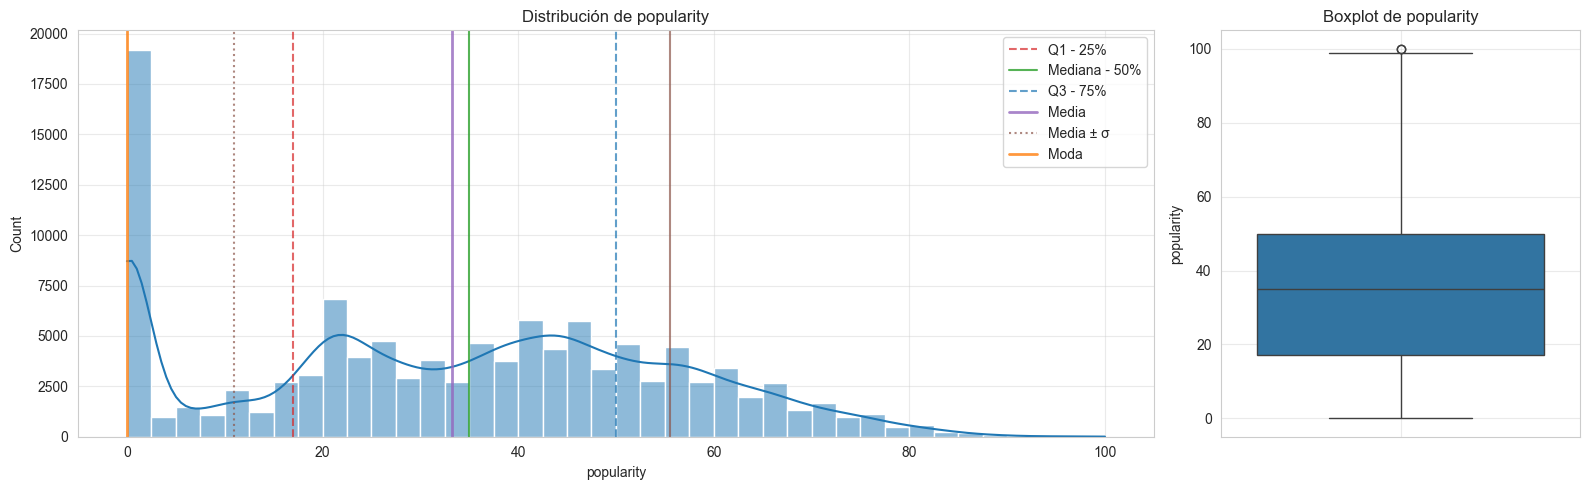

In [19]:
# Distribución de popularity
plot_distribution(num_df, 'popularity')

El conjunto está


#### Variable duration_ms

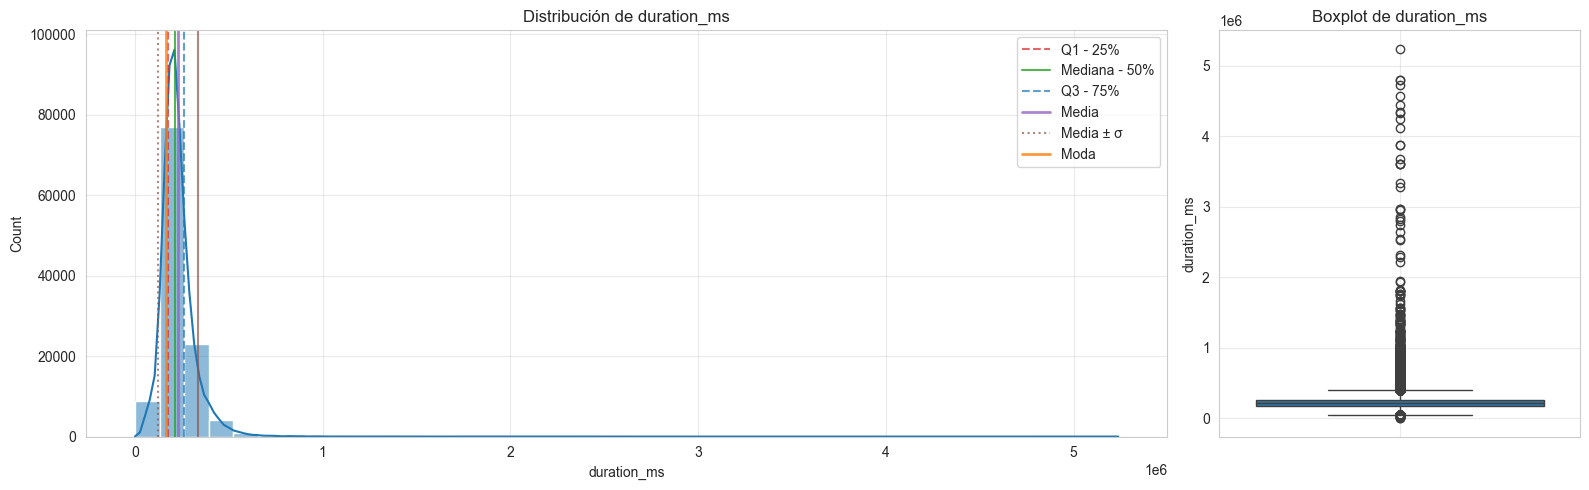

In [8]:
# Distribución de duration_ms
plot_distribution(num_df, 'duration_ms')


Justificación de la distribución de la variable **duration_ms**:


#### Variable danceability

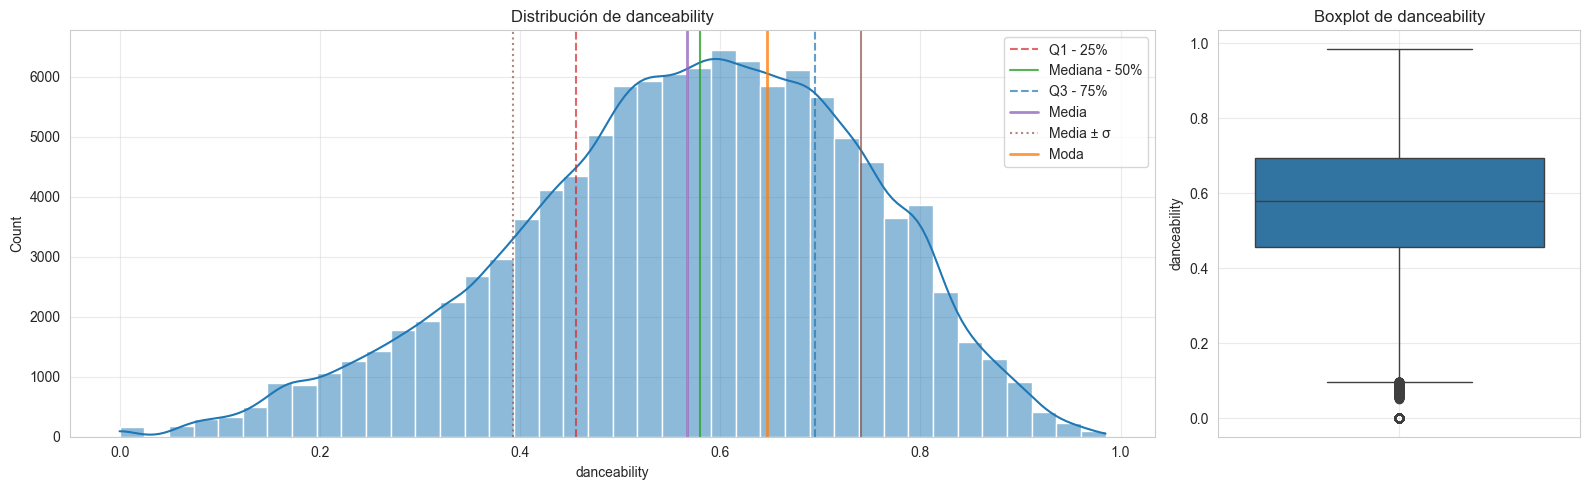

In [20]:
# Distribución de danceability
plot_distribution(num_df, 'danceability')


Justificación de la distribución de la variable **danceability**:


#### Variable energy

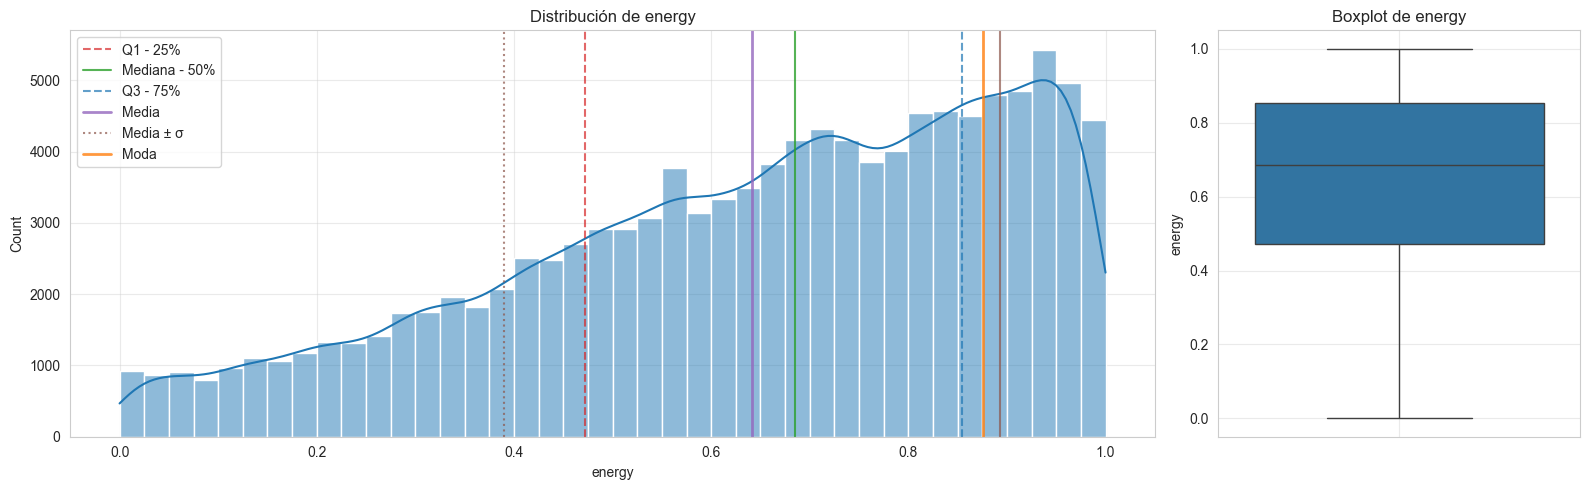

In [10]:
# Distribución de energy
plot_distribution(num_df, 'energy')


Justificación de la distribución de la variable **energy**:


#### Variable key

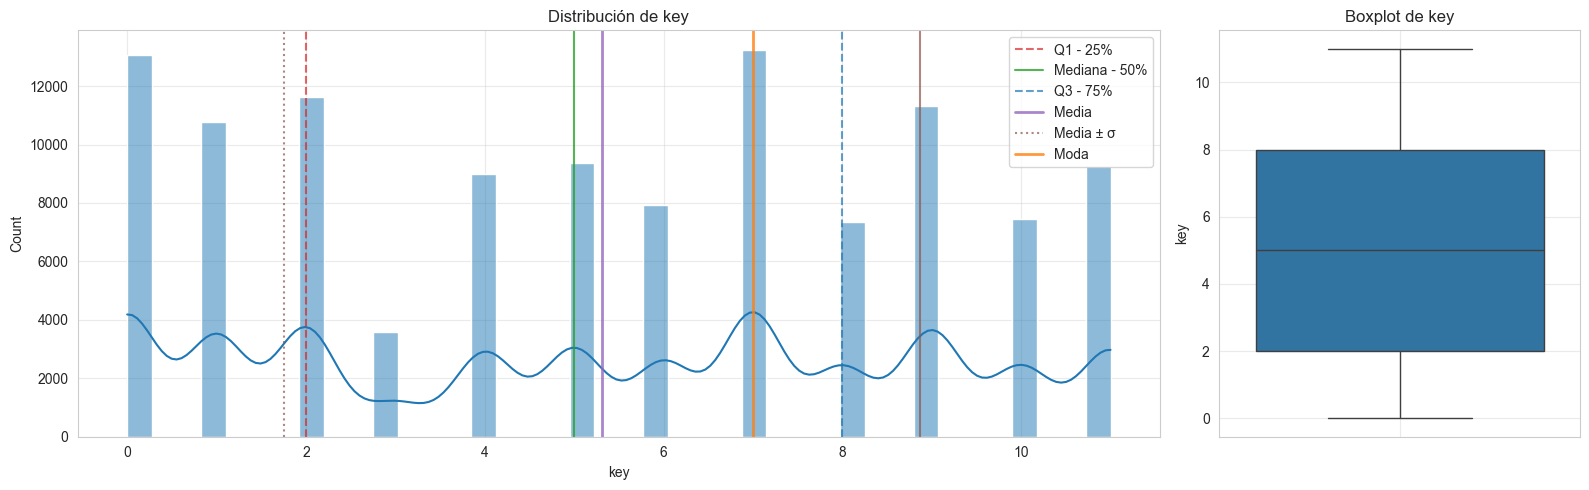

In [11]:
# Distribución de key
plot_distribution(num_df, 'key')


Justificación de la distribución de la variable **key**:


#### Variable loudness

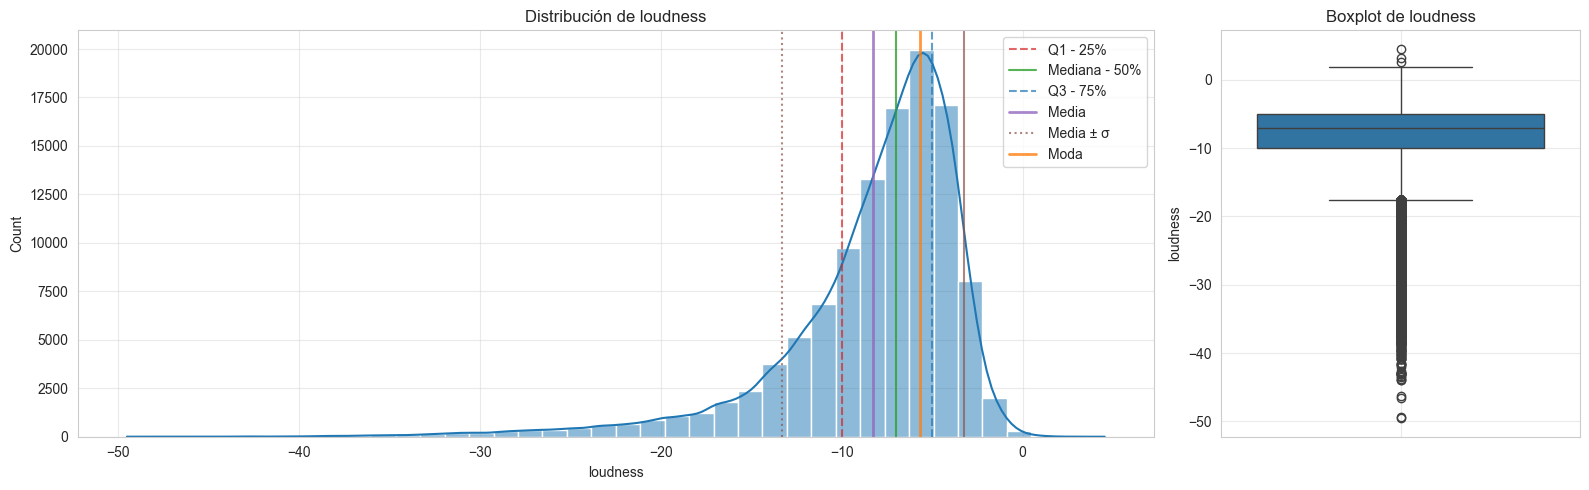

In [12]:
# Distribución de loudness
plot_distribution(num_df, 'loudness')


Justificación de la distribución de la variable **loudness**:


#### Variable speechiness

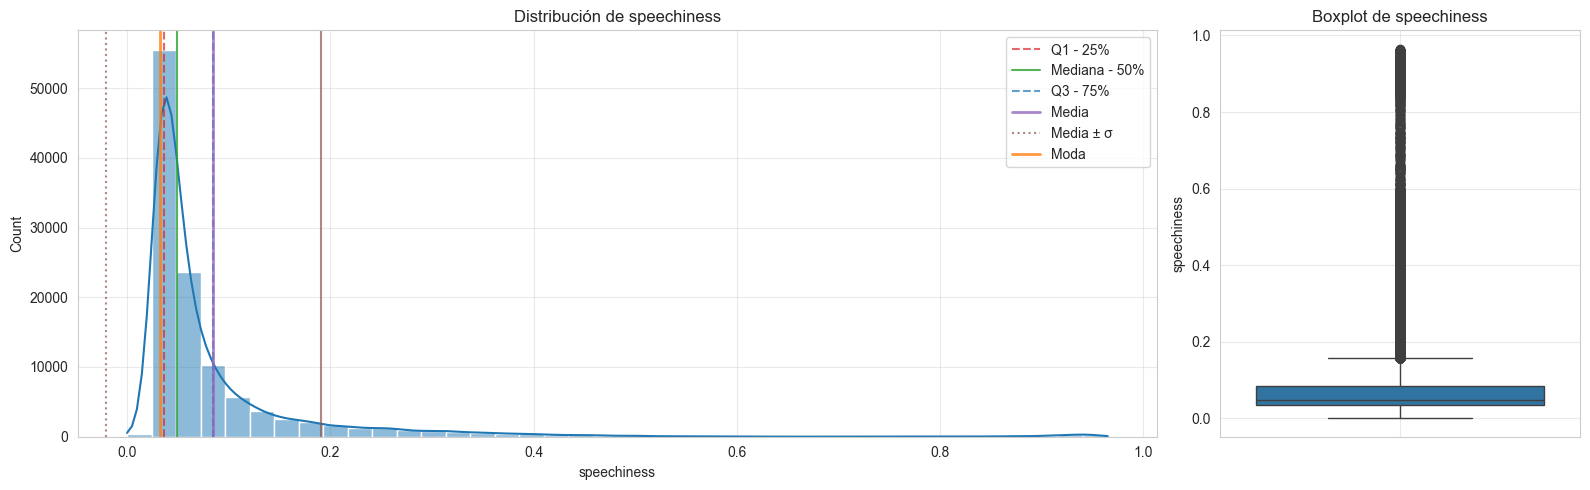

In [13]:
# Distribución de speechiness
plot_distribution(num_df, 'speechiness')


Justificación de la distribución de la variable **speechiness**:


#### Variable acousticness

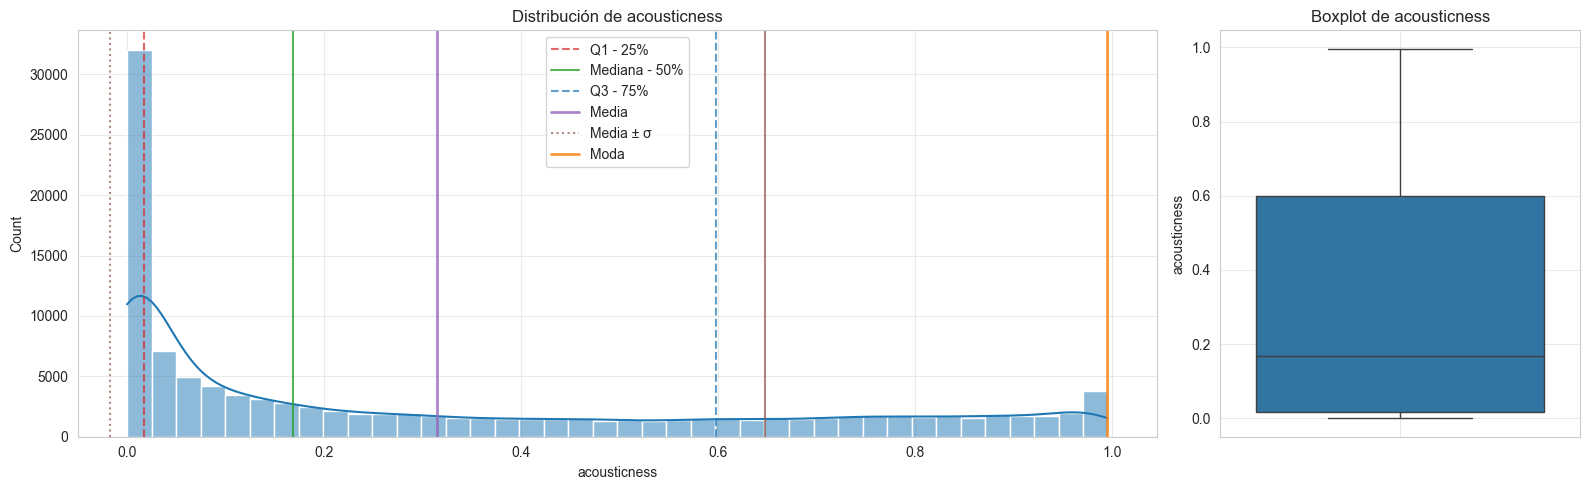

In [14]:
# Distribución de acousticness
plot_distribution(num_df, 'acousticness')


Justificación de la distribución de la variable **acousticness**:


#### Variable instrumentalness

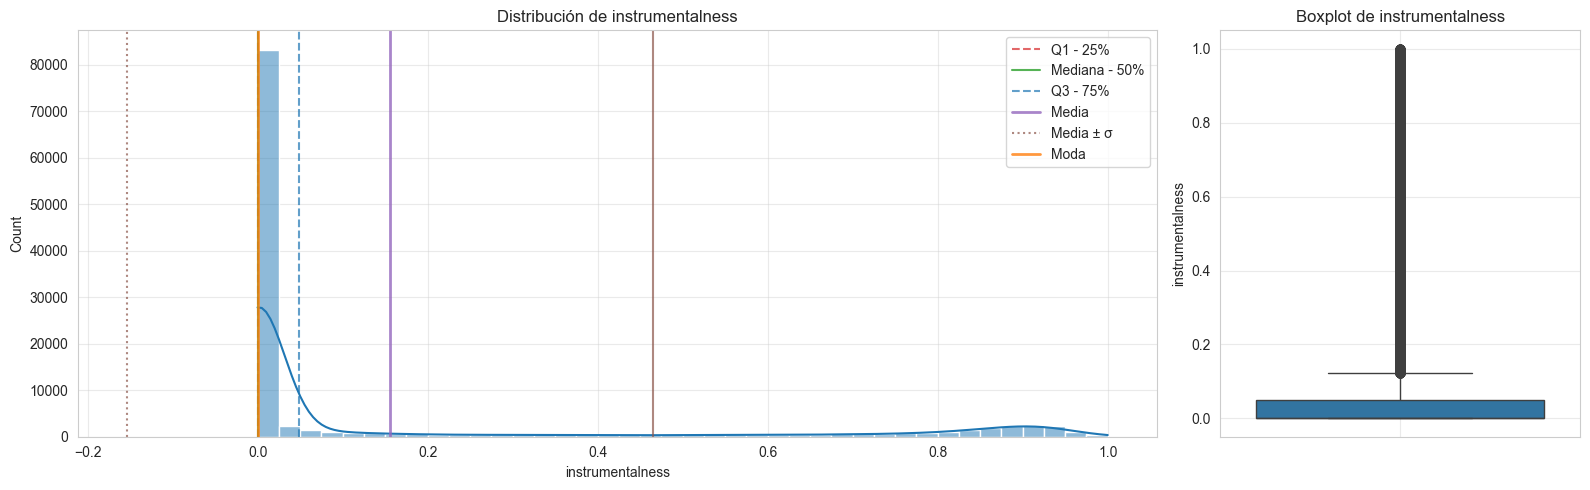

In [15]:
# Distribución de instrumentalness
plot_distribution(num_df, 'instrumentalness')


Justificación de la distribución de la variable **instrumentalness**:


#### Variable liveness

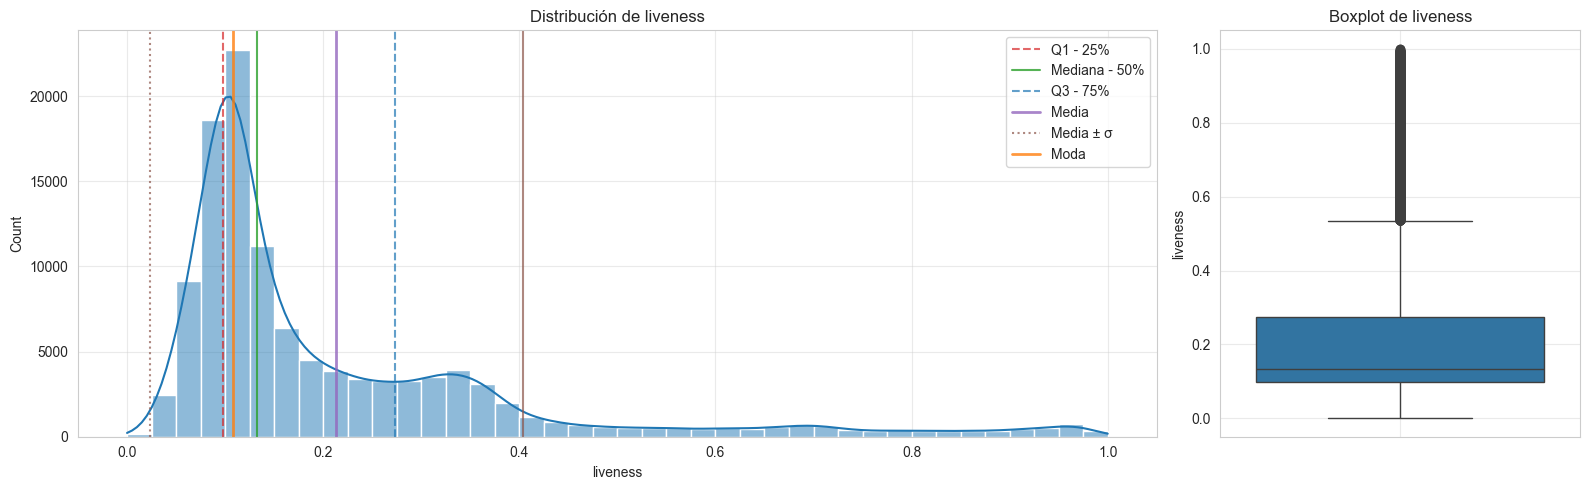

In [16]:
# Distribución de liveness
plot_distribution(num_df, 'liveness')


Justificación de la distribución de la variable **liveness**:


#### Variable valence

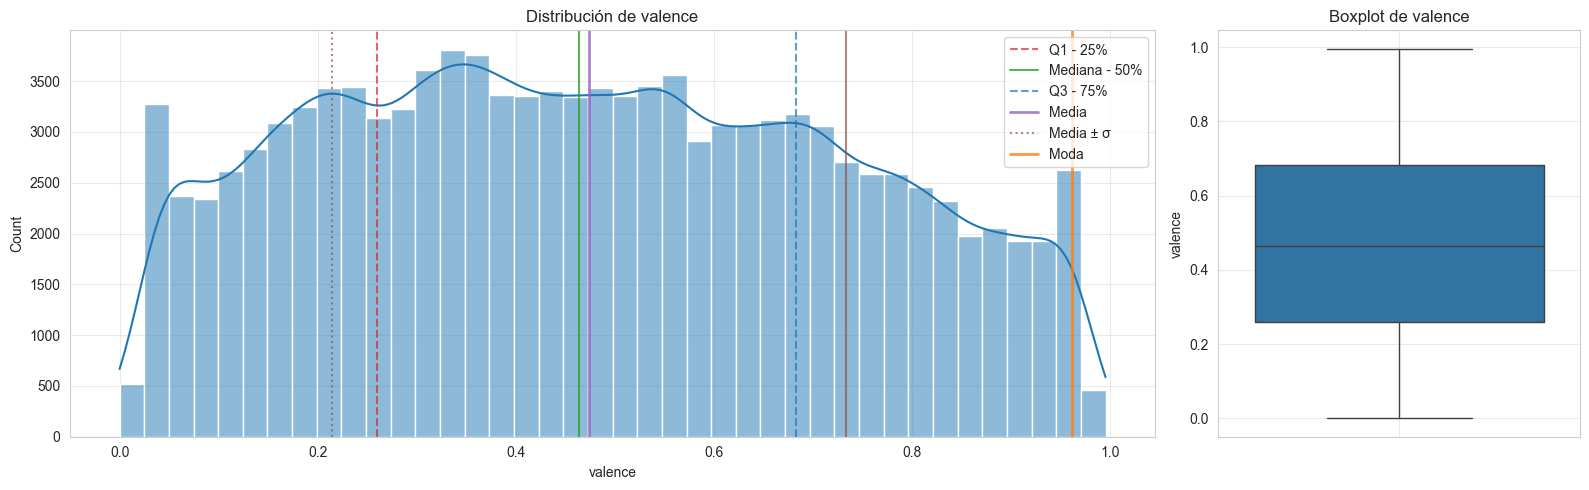

In [17]:
# Distribución de valence
plot_distribution(num_df, 'valence')


Justificación de la distribución de la variable **valence**:


#### Variable tempo

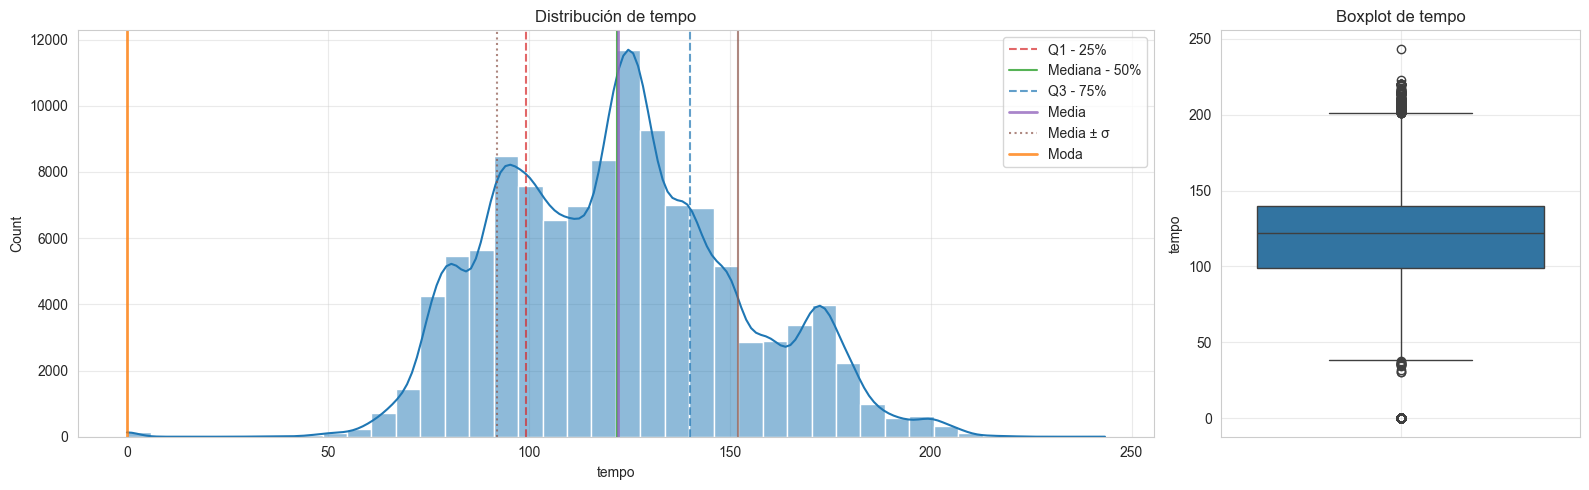

In [18]:
# Distribución de tempo
plot_distribution(num_df, 'tempo')


Justificación de la distribución de la variable **tempo**:
